## Introduction

- In this notebook, I learn to deal with marketing dataset. My goal is to extract insight through data exploration focusing on marketing metrics
- I'm using this dataset  https://archive.ics.uci.edu/dataset/222/bank+marketing for the case.

These variables are going to be the main focus to calculate customer engagement:
  
  1. `contact`:
    - Represents the contact communication type, such as cellular, telephone, or unknown. It captures the method of contact made by the bank to engage with customers.
  
  2. `month`:
    - Indicates the month of the last contact with the customer. It provides information on the timing of the engagement.
  
  3. `day_of_week`:
    - Represents the day of the week of the last contact. It offers insights into the specific days when customers were engaged.

## Import Libraries and Data

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('bank-additional-full.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


| Variable Name   | Role    | Type         | Demographic      | Description                                                                                                                                                                    | Units | Missing Values |
|-----------------|---------|--------------|------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-------|----------------|
| age             | Feature | Integer      | Age              | Age                                                                                                                                                                            |       | no             |
| job             | Feature | Categorical  | Occupation       | type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')   |       | no             |
| marital         | Feature | Categorical  | Marital Status   | marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)                                                             |       | no             |
| education       | Feature | Categorical  | Education Level  | (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')                                                 |       | no             |
| default         | Feature | Binary       |                  | has credit in default?                                                                                                                                                        |       | no             |
| balance         | Feature | Integer      |                  | average yearly balance                                                                                                                                                        | euros | no             |
| housing         | Feature | Binary       |                  | has housing loan?                                                                                                                                                             |       | yes            |
| loan            | Feature | Binary       |                  | has personal loan?                                                                                                                                                            |       | no             |
| contact         | Feature | Categorical  |                  | contact communication type (categorical: 'cellular','telephone')                                                                                                              |       | yes            |
| day_of_week     | Feature | Date         |                  | last contact day of the week                                                                                                                                                   |       | no             |
| month           | Feature | Date         |                  | last contact month of year (categorical: 'jan','feb','mar',...,'nov','dec')                                                                                                    |       | no             |
| duration        | Feature | Integer      |                  | last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model. |       | no             |
| campaign        | Feature | Integer      |                  | number of contacts performed during this campaign and for this client (numeric, includes last contact)                                                                         |       | no             |
| pdays           | Feature | Integer      |                  | number of days that passed by after the client was last contacted from a previous campaign (numeric: -1 means client was not previously contacted)                             |       | yes            |
| previous        | Feature | Integer      |                  | number of contacts performed before this campaign and for this client                                                                                                          |       | no             |
| poutcome        | Feature | Categorical  |                  | outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')                                                                                   |       | yes            |
| y               | Target  | Binary       |                  | has the client subscribed a term deposit?                                                                                                                                      |       | no             |


# 1. Data Cleaning and Pre-processing

## Check for duplicates

In [8]:
print('Total rows:', len(df))

Total rows: 41188


In [4]:
df.duplicated().sum()

12

I wanna check if there is a same customer that duplicated on the dataset, cause there is no `id's` on the dataset.

In [5]:
df.duplicated(subset= ["age", "job" ,"marital", "education", "housing", "loan"]).sum()

30719

There is a lot of duplicated data here. Why are they duplicated? Is it an error or could there be other explanation?

In [9]:
df[df.duplicated(subset= ["age", "job" ,"marital", "education", "housing", "loan"])].head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
10,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
11,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
16,35,blue-collar,married,basic.6y,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
31,59,technician,married,unknown,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
86,41,management,married,basic.6y,no,no,no,telephone,may,mon,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [12]:
# Take one value combination and take a peek at the data

filtered_df = df[(df["age"]==41) &
                 (df["job"]== "blue-collar") &
                 (df["marital"]== "married") &
                 (df["education"]== "unknown") &
                 (df["housing"]== "no") &
                 (df["loan"]== "no")]

# Dropping the filtered columns to show only the remaining ones
result_df = filtered_df.drop(columns=["age", "job", "marital", "education", "housing", "loan"])
result_df

,default,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
7,unknown,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
10,unknown,telephone,may,mon,55,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8005,no,telephone,jun,mon,424,2,999,0,nonexistent,1.4,94.465,-41.8,4.865,5228.1,no
12180,no,telephone,jul,tue,529,1,999,0,nonexistent,1.4,93.918,-42.7,4.955,5228.1,no
12533,no,cellular,jul,mon,226,1,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,no
12959,no,cellular,jul,tue,89,1,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
14891,unknown,cellular,jul,wed,516,4,999,0,nonexistent,1.4,93.918,-42.7,4.957,5228.1,no
29174,unknown,cellular,apr,fri,203,1,999,1,failure,-1.8,93.075,-47.1,1.405,5099.1,no


If you look at the table, the same data has different days, durations, months, and campaigns. So, there seems to be no duplicates that would harm the analyses.

## Check unique values

In [13]:
print(df["contact"].value_counts())

contact
cellular     26144
telephone    15044
Name: count, dtype: int64


In [14]:
print(df["month"].value_counts())

month
may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: count, dtype: int64


In [15]:
print(df["day_of_week"].value_counts())

day_of_week
thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: count, dtype: int64


## Check missing value

In [16]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

## Checking for outliers

Here, I take the case that marketing needs to check if we need to exclude outliers based on age.  
So i will do exploration on the distribution of `age` column.

In [17]:
df["age"].describe()

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

In [18]:
# Get the average value
print("average : ", np.mean(df["age"]))

# Get the 5th, 50th, and 95th percentile value
print("5th percentile : ", np.percentile(df["age"], 5))
print("50th percentile : ", np.percentile(df["age"], 50))
print("95th percentile : ", np.percentile(df["age"], 95))

average :  40.02406040594348
5th percentile :  26.0
50th percentile :  38.0
95th percentile :  58.0


There is two ways to visualize distribution of `age` column: Histogram and Box Plot 

c:\Users\vince\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


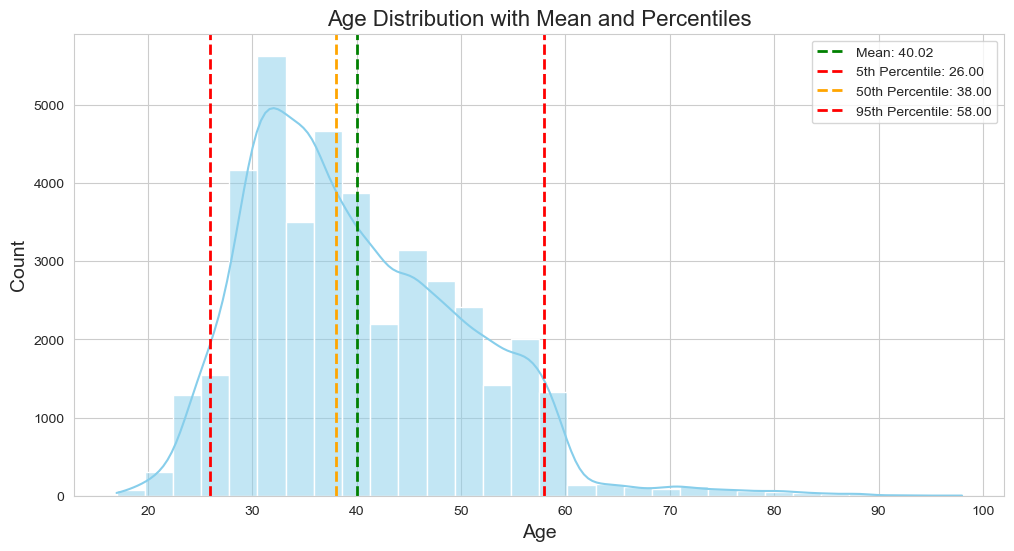

In [22]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(12, 6))

# Create a histogram for the `age` column
sns.histplot(data=df, x="age", bins=30, kde=True, ax=ax, color='skyblue')

# Add vertical lines for mean and percentiles
mean_age = np.mean(df["age"])
percentiles = np.percentile(df["age"], [5, 50, 95])

# Plotting mean
ax.axvline(x=mean_age, color="green", linestyle="--", lw=2, label=f'Mean: {mean_age:.2f}')

# Plotting percentiles
colors = ['red', 'orange', 'red']
percentile_labels = ['5th Percentile', '50th Percentile', '95th Percentile']
for perc, color, label in zip(percentiles, colors, percentile_labels):
    ax.axvline(x=perc, color=color, linestyle="--", lw=2, label=f'{label}: {perc:.2f}')

# Adding titles and labels
ax.set_title('Age Distribution with Mean and Percentiles', fontsize=16)
ax.set_xlabel('Age', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

# Adding a legend
ax.legend()

# Show the plot
plt.show()

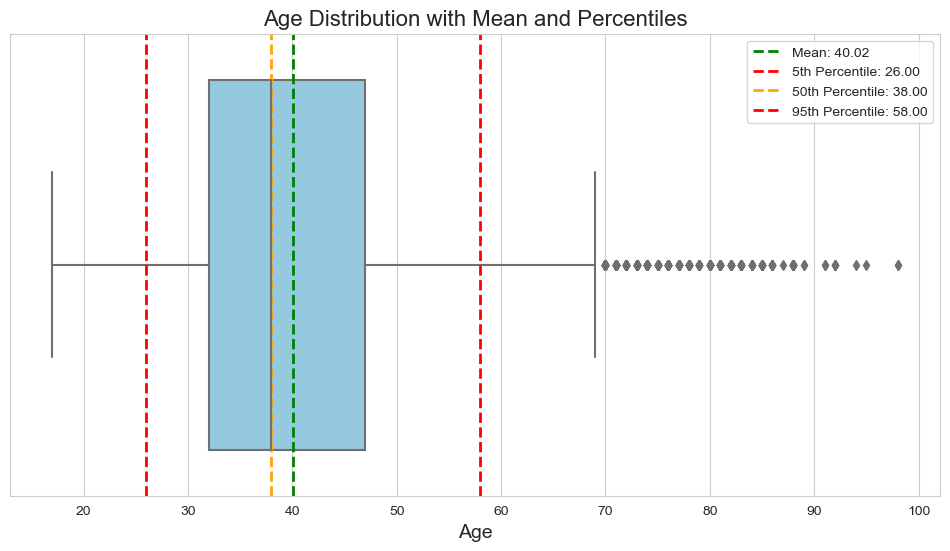

In [23]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(12, 6))

# Create a box plot for the `age` column
sns.boxplot(x=df["age"], ax=ax, color='skyblue')

# Add vertical lines for mean and percentiles
mean_age = np.mean(df["age"])
percentiles = np.percentile(df["age"], [5, 50, 95])

# Plotting mean
ax.axvline(x=mean_age, color="green", linestyle="--", lw=2, label=f'Mean: {mean_age:.2f}')

# Plotting percentiles
colors = ['red', 'orange', 'red']
percentile_labels = ['5th Percentile', '50th Percentile', '95th Percentile']
for perc, color, label in zip(percentiles, colors, percentile_labels):
    ax.axvline(x=perc, color=color, linestyle="--", lw=2, label=f'{label}: {perc:.2f}')

# Adding titles and labels
ax.set_title('Age Distribution with Mean and Percentiles', fontsize=16)
ax.set_xlabel('Age', fontsize=14)

# Adding a legend
ax.legend()

# Show the plot
plt.show()

c:\Users\vince\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.75, 0.95, 'Skewness: 0.78')

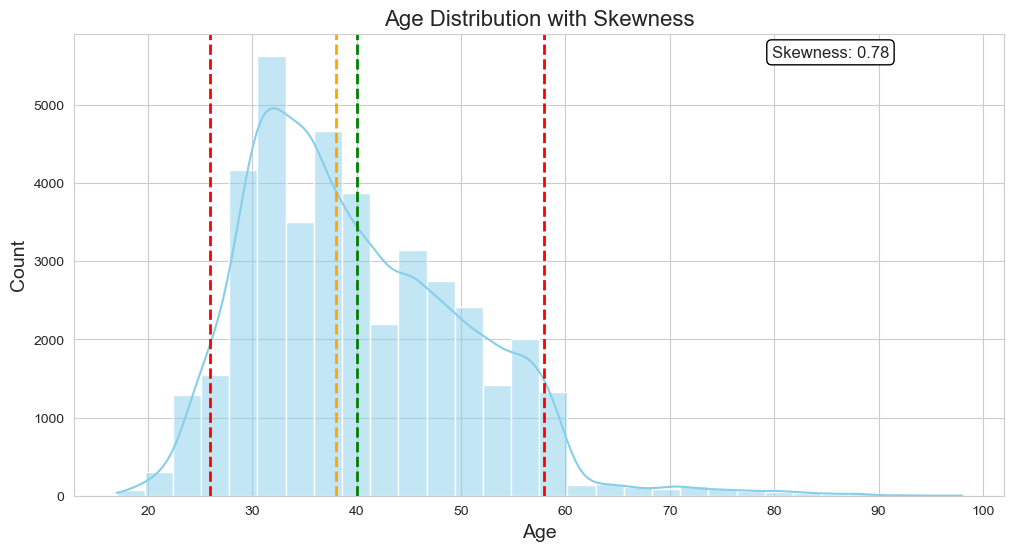

In [27]:
from scipy.stats import skew

# Calculate skewness
age_skewness = skew(df["age"].dropna())

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(12, 6))

# Create a histogram for the `age` column with KDE
sns.histplot(data=df, x="age", bins=30, kde=True, ax=ax, color='skyblue')

# Add vertical lines for mean and percentiles
mean_age = np.mean(df["age"])
percentiles = np.percentile(df["age"], [5, 50, 95])

# Plotting mean
ax.axvline(x=mean_age, color="green", linestyle="--", lw=2, label=f'Mean: {mean_age:.2f}')

# Plotting percentiles
colors = ['red', 'orange', 'red']
percentile_labels = ['5th Percentile', '50th Percentile', '95th Percentile']
for perc, color, label in zip(percentiles, colors, percentile_labels):
    ax.axvline(x=perc, color=color, linestyle="--", lw=2, label=f'{label}: {perc:.2f}')

# Adding titles and labels
ax.set_title('Age Distribution with Skewness', fontsize=16)
ax.set_xlabel('Age', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

# Adding skewness value annotation
ax.annotate(f'Skewness: {age_skewness:.2f}', xy=(0.75, 0.95), xycoords='axes fraction', fontsize=12,
            bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white'))

# Adding a legend
# ax.legend()

# Show the 

c:\Users\vince\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


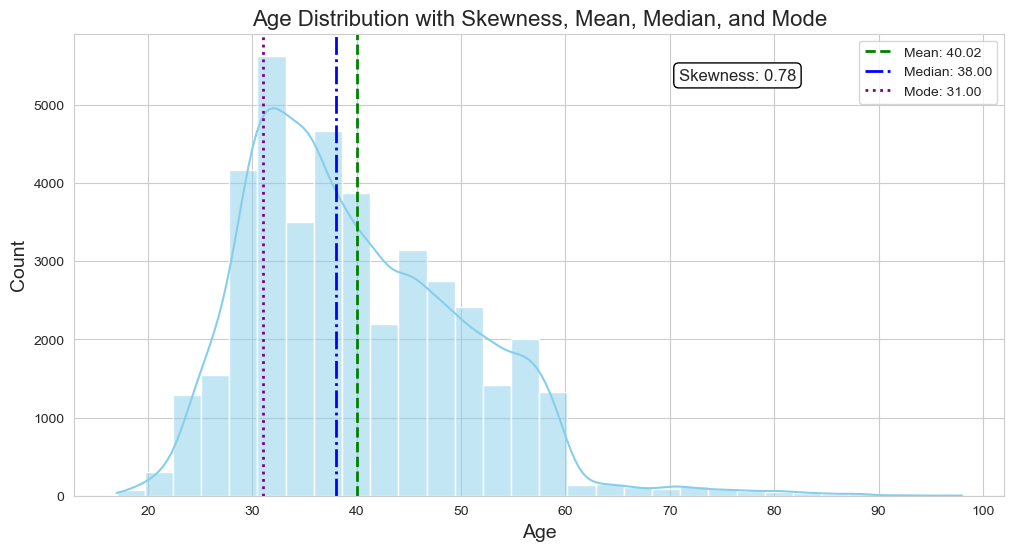

In [33]:
# Calculate skewness
age_skewness = skew(df["age"].dropna())

# Calculate mean, median, and mode
mean_age = np.mean(df["age"])
median_age = np.median(df["age"])
mode_age = df["age"].mode()[0]  # mode() returns a series, get the first value

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(12, 6))

# Create a histogram for the `age` column with KDE
sns.histplot(data=df, x="age", bins=30, kde=True, ax=ax, color='skyblue')

# Add vertical lines for mean and percentiles
percentiles = np.percentile(df["age"], [5, 50, 95])

# Plotting mean
ax.axvline(x=mean_age, color="green", linestyle="--", lw=2, label=f'Mean: {mean_age:.2f}')

# Plotting median
ax.axvline(x=median_age, color="blue", linestyle="-.", lw=2, label=f'Median: {median_age:.2f}')

# Plotting mode
ax.axvline(x=mode_age, color="purple", linestyle=":", lw=2, label=f'Mode: {mode_age:.2f}')

# Adding titles and labels
ax.set_title('Age Distribution with Skewness, Mean, Median, and Mode', fontsize=16)
ax.set_xlabel('Age', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

# Adding skewness value annotation
ax.annotate(f'Skewness: {age_skewness:.2f}', xy=(0.65, 0.9), xycoords='axes fraction', fontsize=12,
            bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white'))

# Adding a legend
ax.legend()

# Show the plot
plt.show()

Understanding Skewness:
  1. Positive Skewness: When skewness is greater than 0, the distribution is positively skewed (right-skewed). This means the right tail (higher values) is longer or fatter than the left tail (lower values).
  2. Negative Skewness: When skewness is less than 0, the distribution is negatively skewed (left-skewed). This means the left tail (lower values) is longer or fatter than the right tail (higher values).
  3. Zero Skewness: When skewness is 0, the distribution is perfectly symmetrical.

It doesn't seem like there is any proof that the outlier will interfere with the analysis since:
  1. The outlier is not skewing the data dsitribution too much. This can be seen by comparing the median and average value.  
  *Since 0.78 is greater than 0, the distribution is positively skewed. The value 0.78 indicates a moderate degree of skewness. It’s not extremely skewed, but it’s noticeably asymmetrical.*  
    
  2. There are a lot of outliers, but the moajority of the data can still be considered to be distributed normally. I might lose important information if I decide to filter out the outliers.

## Adding Customer ID

- Unique identifier for each customer
- In the bank marketing dataset, each row represents one instance of a contact made with a customer rather than one customer ID.
- Therefore, there can be multiple rows with the same customer ID, indicating multiple contacts made with the same customer.
- I will use a combination of age, job, marital, education, housing, and loan columns to create a unique identifier for each customer.

In [34]:
df["customer_id"] = df["age"].astype(str) + '_' + df["job"].astype(str) + '_' + df["marital"].astype(str) + '_' + \
                      df["education"].astype(str) + '_' + df["housing"].astype(str) + '_' + df["loan"]
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,customer_id
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,56_housemaid_married_basic.4y_no_no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,57_services_married_high.school_no_no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,37_services_married_high.school_yes_no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,40_admin._married_basic.6y_no_no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,56_services_married_high.school_no_yes


In [36]:
print('Total customers:', df["customer_id"].nunique())

Total customers: 10469


# 2. Calculate Engagement Metrics

Relevant variables for analysis
1. `contact`: The contact communication type (e.g., cellular, telephone).
2. `month`: The month of the last contact with the customer.
3. `day_of_week`: The day of the week of the last contact.
4. `duration`: The duration of the last contact in seconds.
5. `campaign`: The number of contacts performed as part of a specific marketing campaign for the customer.
6. `previous`: The number of contacts made with the customer before the current campaign.
7. `poutcome`: The outcome of the previous marketing campaign (e.g., success, failure, unknown).
8. `education`: The customer's education level.
9. `job`: The customer's occupation or job category.
10. `age`: The customer's age.
11. `marital`: The customer's marital status.
12. `housing`: The type of housing the customer has (e.g., own, rent, unknown).

## Contact Frequency
   - Total number of contacts made by each customer.
   - Count the number of contacts made to each customer in the bank marketing datasetby type of contact.
   - Use `.groupby()` to do calculation grouped by certain columns.
   - Use `.size()` to quickly aggregate the number of row.
   - You can call it `channel_usage_freq` but you can also choose your own DataFrame name.

In [38]:
# group by `customer_id` and `contact`
channel_usage_freq = df.groupby(["customer_id", "contact"]).size()

# rename column to be called `count`
channel_usage_freq = pd.DataFrame(channel_usage_freq).rename(columns={0:"count"})

# sort values descending by the `count` column
channel_usage_freq.sort_values(by = "count", ascending=False, inplace=True)

# show the top 5 data
channel_usage_freq.head()

,,count
customer_id,contact,
29_admin._single_university.degree_yes_no,cellular,92
31_admin._single_university.degree_yes_no,cellular,84
30_admin._single_university.degree_no_no,cellular,73
32_admin._single_university.degree_yes_no,cellular,73
30_admin._single_university.degree_yes_no,cellular,72


Show the `count` column distribution.

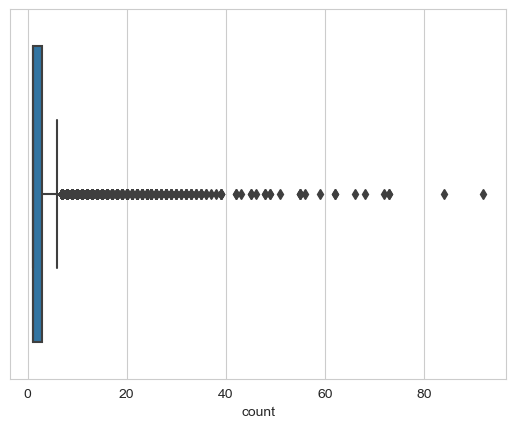

In [39]:
sns.boxplot(data = channel_usage_freq,
            x="count"
            )

plt.show()

- Find contact frequency for each customer.

- Save it to a DataFrame called `contact_frequency`.

In [40]:
# group by `customer_id`
contact_frequency = df.groupby(["customer_id"]).size()

# rename column to be called `count`
contact_frequency = pd.DataFrame(contact_frequency).rename(columns={0:"count"})

# sort values descending by the `count` column
contact_frequency.sort_values(by = "count", ascending=False)

,count
customer_id,
29_admin._single_university.degree_yes_no,114
31_admin._single_university.degree_yes_no,101
32_admin._single_university.degree_yes_no,92
32_admin._single_university.degree_no_no,89
29_admin._single_university.degree_no_no,88
...,...
40_technician_married_high.school_yes_yes,1
40_technician_married_basic.9y_no_yes,1
40_technician_married_basic.4y_yes_no,1


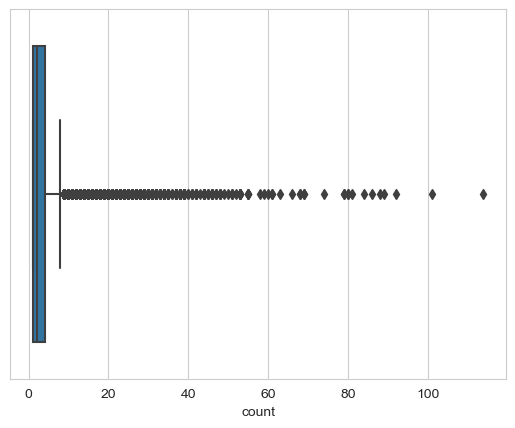

In [41]:
sns.boxplot(data = contact_frequency,
            x="count"
            )

plt.show()

## Duration of contact

  - Average or total duration of contacts made by each customer.

  - Calculate the average and sum of the duration of contacts for each customer in the dataset.

  - Use `.agg()` function to aggregate a column.

In [42]:
# group by `customer_id`
duration_of_contact = df.groupby(["customer_id"]).agg({"duration":["sum", "mean"]})


# show the top 5 data
duration_of_contact.head()

duration       
                                                sum   mean
customer_id                                               
17_student_single_basic.9y_unknown_unknown      498  498.0
17_student_single_basic.9y_yes_no               274  137.0
17_student_single_unknown_no_yes                896  896.0
17_student_single_unknown_yes_no                432  432.0
18_student_single_basic.4y_no_no                108  108.0

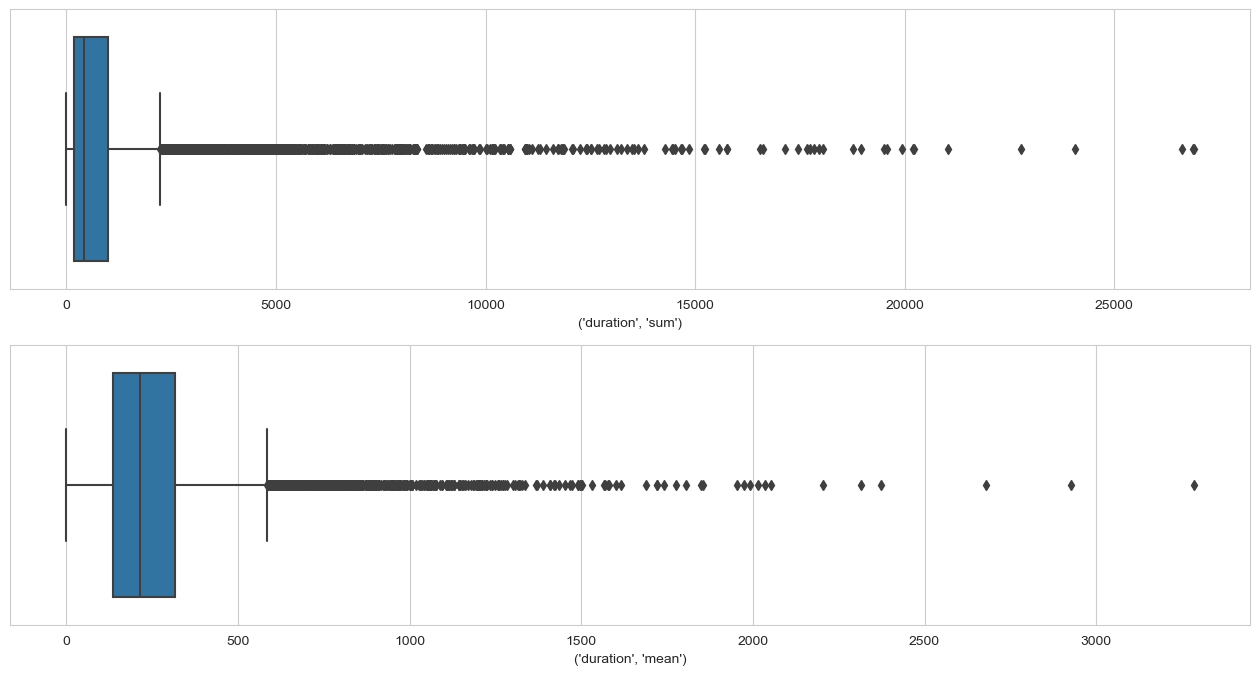

In [43]:
fig, ax = plt.subplots(figsize=(16,8), nrows=2)

# create 1st plot
sns.boxplot(data = duration_of_contact,
            x = ("duration","sum"), # pay attention to the multiindex column
            ax=ax[0]
            )

# create 2nd plot
sns.boxplot(data = duration_of_contact,
            x = ("duration","mean"),
            ax=ax[1]
            )

plt.show()

## Most frequent contact

- Preferred banking channels used by the customer.
  
- Determine the most frequently used channel by each customer based on contact frequency for each channel.

- Use the `channel_usage_freq` DataFrame you have created before.

- Use `dense rank` to rank each customer's contact frequency.

In [44]:
# reset index if needed
channel_usage_freq.reset_index(inplace=True)

# create a column called `rank` using dense rank
channel_usage_freq['rank'] = channel_usage_freq.groupby(["customer_id"])["count"].rank(method='dense', ascending=False).astype(int)
channel_usage_freq

,customer_id,contact,count,rank
0,29_admin._single_university.degree_yes_no,cellular,92,1
1,31_admin._single_university.degree_yes_no,cellular,84,1
2,30_admin._single_university.degree_no_no,cellular,73,1
3,32_admin._single_university.degree_yes_no,cellular,73,1
4,30_admin._single_university.degree_yes_no,cellular,72,1
...,...,...,...,...
14005,39_services_divorced_basic.6y_no_no,telephone,1,1
14006,39_services_divorced_basic.9y_no_no,telephone,1,1
14007,39_services_divorced_professional.course_yes_yes,cellular,1,1
14008,39_services_divorced_unknown_yes_no,cellular,1,1


In [45]:
# Check for one `customer_id`

channel_usage_freq[channel_usage_freq["customer_id"]=='18_student_single_unknown_no_no']

,customer_id,contact,count,rank
6443,18_student_single_unknown_no_no,telephone,2,1
10887,18_student_single_unknown_no_no,cellular,1,2


In [46]:
channel_usage_freq_ranked = channel_usage_freq[channel_usage_freq["rank"] == 1].copy()
channel_usage_freq_ranked.head()

,customer_id,contact,count,rank
0,29_admin._single_university.degree_yes_no,cellular,92,1
1,31_admin._single_university.degree_yes_no,cellular,84,1
2,30_admin._single_university.degree_no_no,cellular,73,1
3,32_admin._single_university.degree_yes_no,cellular,73,1
4,30_admin._single_university.degree_yes_no,cellular,72,1


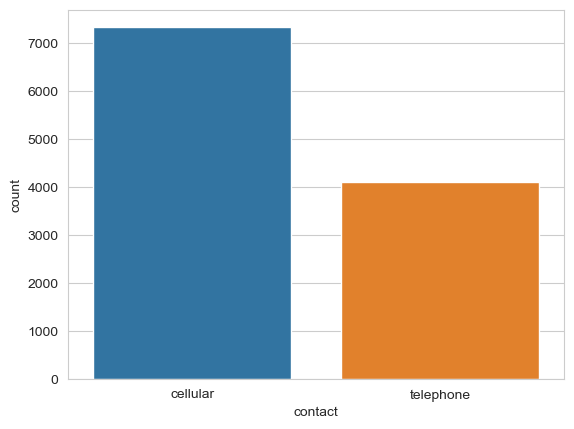

In [47]:
# show frquency of each value in the `contact` column
sns.countplot(data = channel_usage_freq_ranked,
              x= "contact"
              )

# show the graph
plt.show()

## Campaign conversion rate

- Rate at which customers respond yes to marketing campaigns.

- Divide the number of customers who responded yes to a specific marketing campaign by the total number of customers targeted for that campaign.


- First, we need to know the number of unique `customer_id` per `campaign`.

- Name the result column to be `unique_cust_cnt`.

In [48]:
# find unique customer_id per campaign
campaign_unique_cust = df.groupby(["campaign"]).agg({"customer_id":"nunique"})


# properly rename the result column to be `unique_cust_cnt`
campaign_unique_cust = campaign_unique_cust.rename(columns={"customer_id": "unique_cust_cnt"})


# Check first 5 data
campaign_unique_cust.head()

,unique_cust_cnt
campaign,
1,6565
2,4973
3,3153
4,1928
5,1252


- Now we need to find unique `customer_id` that responded to the campaign.

- We can do this by first finding unique `customer_id` per `campaign` and `y`.

- Name the result column to be `unique_respond_cust_cnt`.

In [49]:
# find unique customer_id per campaign and y
campaign_respond_unique_cust = df.groupby(["campaign", "y"]).agg({"customer_id":"nunique"})

# properly rename the result column to be `unique_respond_cust_cnt`
campaign_respond_unique_cust = campaign_respond_unique_cust.rename(columns={"customer_id": "unique_respond_cust_cnt"})

# Check first 5 data
campaign_respond_unique_cust.head()

unique_respond_cust_cnt
campaign y                           
1        no                      6002
         yes                     1645
2        no                      4580
         yes                      994
3        no                      2915

- We can then combine the 2 DataFrame by merging them together using `.merge()`.

- Pay attention to the result of the merge and the variables we merge them on.

In [50]:
# Merge campaign_respond_unique_cust and campaign_unique_cust by the index
campaign_conv_rate = campaign_respond_unique_cust.merge(campaign_unique_cust, left_index=True, right_index=True)

# Check first 5 data
campaign_conv_rate.head()

unique_respond_cust_cnt  unique_cust_cnt
campaign y                                            
1        no                      6002             6565
         yes                     1645             6565
2        no                      4580             4973
         yes                      994             4973
3        no                      2915             3153

- With some Pandas slicing and magic, we can find the campaign conversion rate by dividing the number of unique customer who responded to the campaign (`responded_customer` from `campaign_respond_unique_cust`) with the total number of customer targeted by each campaign (`total_customer` from `campaign_unique_cust`).

- First, create new DataFrame to keep the old DataFrame save. But only get the rows where `y = yes`.

In [51]:
# Create new DataFrame to keep the old DataFrame save. But only get the rows where `y = yes`
campaign_conv_rate_responded = campaign_conv_rate.loc[(slice(None),"yes"),:].copy()


# rename the columns
campaign_conv_rate_responded.rename(columns={"unique_respond_cust_cnt":"responded_customer",
                                             "unique_cust_cnt":"total_customer"
                                             }, inplace=True)

# get conversion rate
campaign_conv_rate_responded["campaign_conversion_rate"] = campaign_conv_rate_responded["responded_customer"] / campaign_conv_rate_responded["total_customer"]

# show result
campaign_conv_rate_responded.head()

,,responded_customer,total_customer,campaign_conversion_rate
campaign,y,,,
1,yes,1645,6565,0.250571
2,yes,994,4973,0.199879
3,yes,511,3153,0.162068
4,yes,241,1928,0.125000
5,yes,117,1252,0.093450


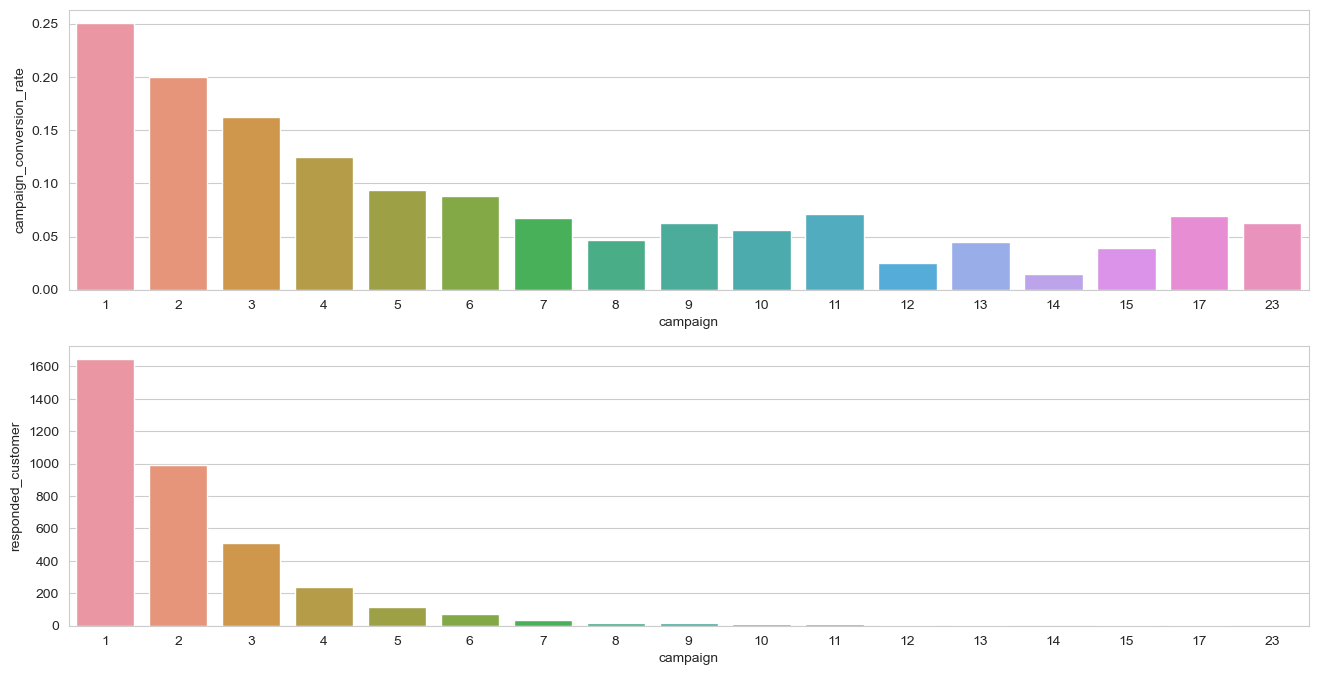

In [52]:
fig, ax = plt.subplots(figsize=(16,8), nrows=2)

sns.barplot(data = campaign_conv_rate_responded.reset_index(),
            x = "campaign",
            y = "campaign_conversion_rate",
            ax = ax[0]
            )

sns.barplot(data = campaign_conv_rate_responded.reset_index(),
            x = "campaign",
            y = "responded_customer",
            ax = ax[1]
            )

plt.show()

## Campaign engagement

- Number of contacts made as part of each marketing campaign.

- Count the number of contacts made for each customer within each marketing campaign in the dataset.

In [53]:
# find number of row per customer_id per campaign and y
campaign_engagement = pd.DataFrame(df.groupby(["customer_id", "campaign"]).size())

# properly rename the result column to be `count`
campaign_engagement.rename(columns={0:"count"}, inplace=True)

# reset index
campaign_engagement.reset_index(inplace=True)

# sort values by `count`
campaign_engagement.sort_values(by="count")

,customer_id,campaign,count
0,17_student_single_basic.9y_unknown_unknown,2,1
13033,44_technician_married_professional.course_unkn...,3,1
13037,44_technician_married_professional.course_yes_no,6,1
13039,44_technician_married_professional.course_yes_no,9,1
13041,44_technician_married_professional.course_yes_yes,2,1
...,...,...,...
5887,34_admin._married_university.degree_no_no,1,40
2986,30_admin._single_university.degree_yes_no,1,43
2973,30_admin._single_university.degree_no_no,1,44
3719,31_admin._single_university.degree_yes_no,1,49


c:\Users\vince\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


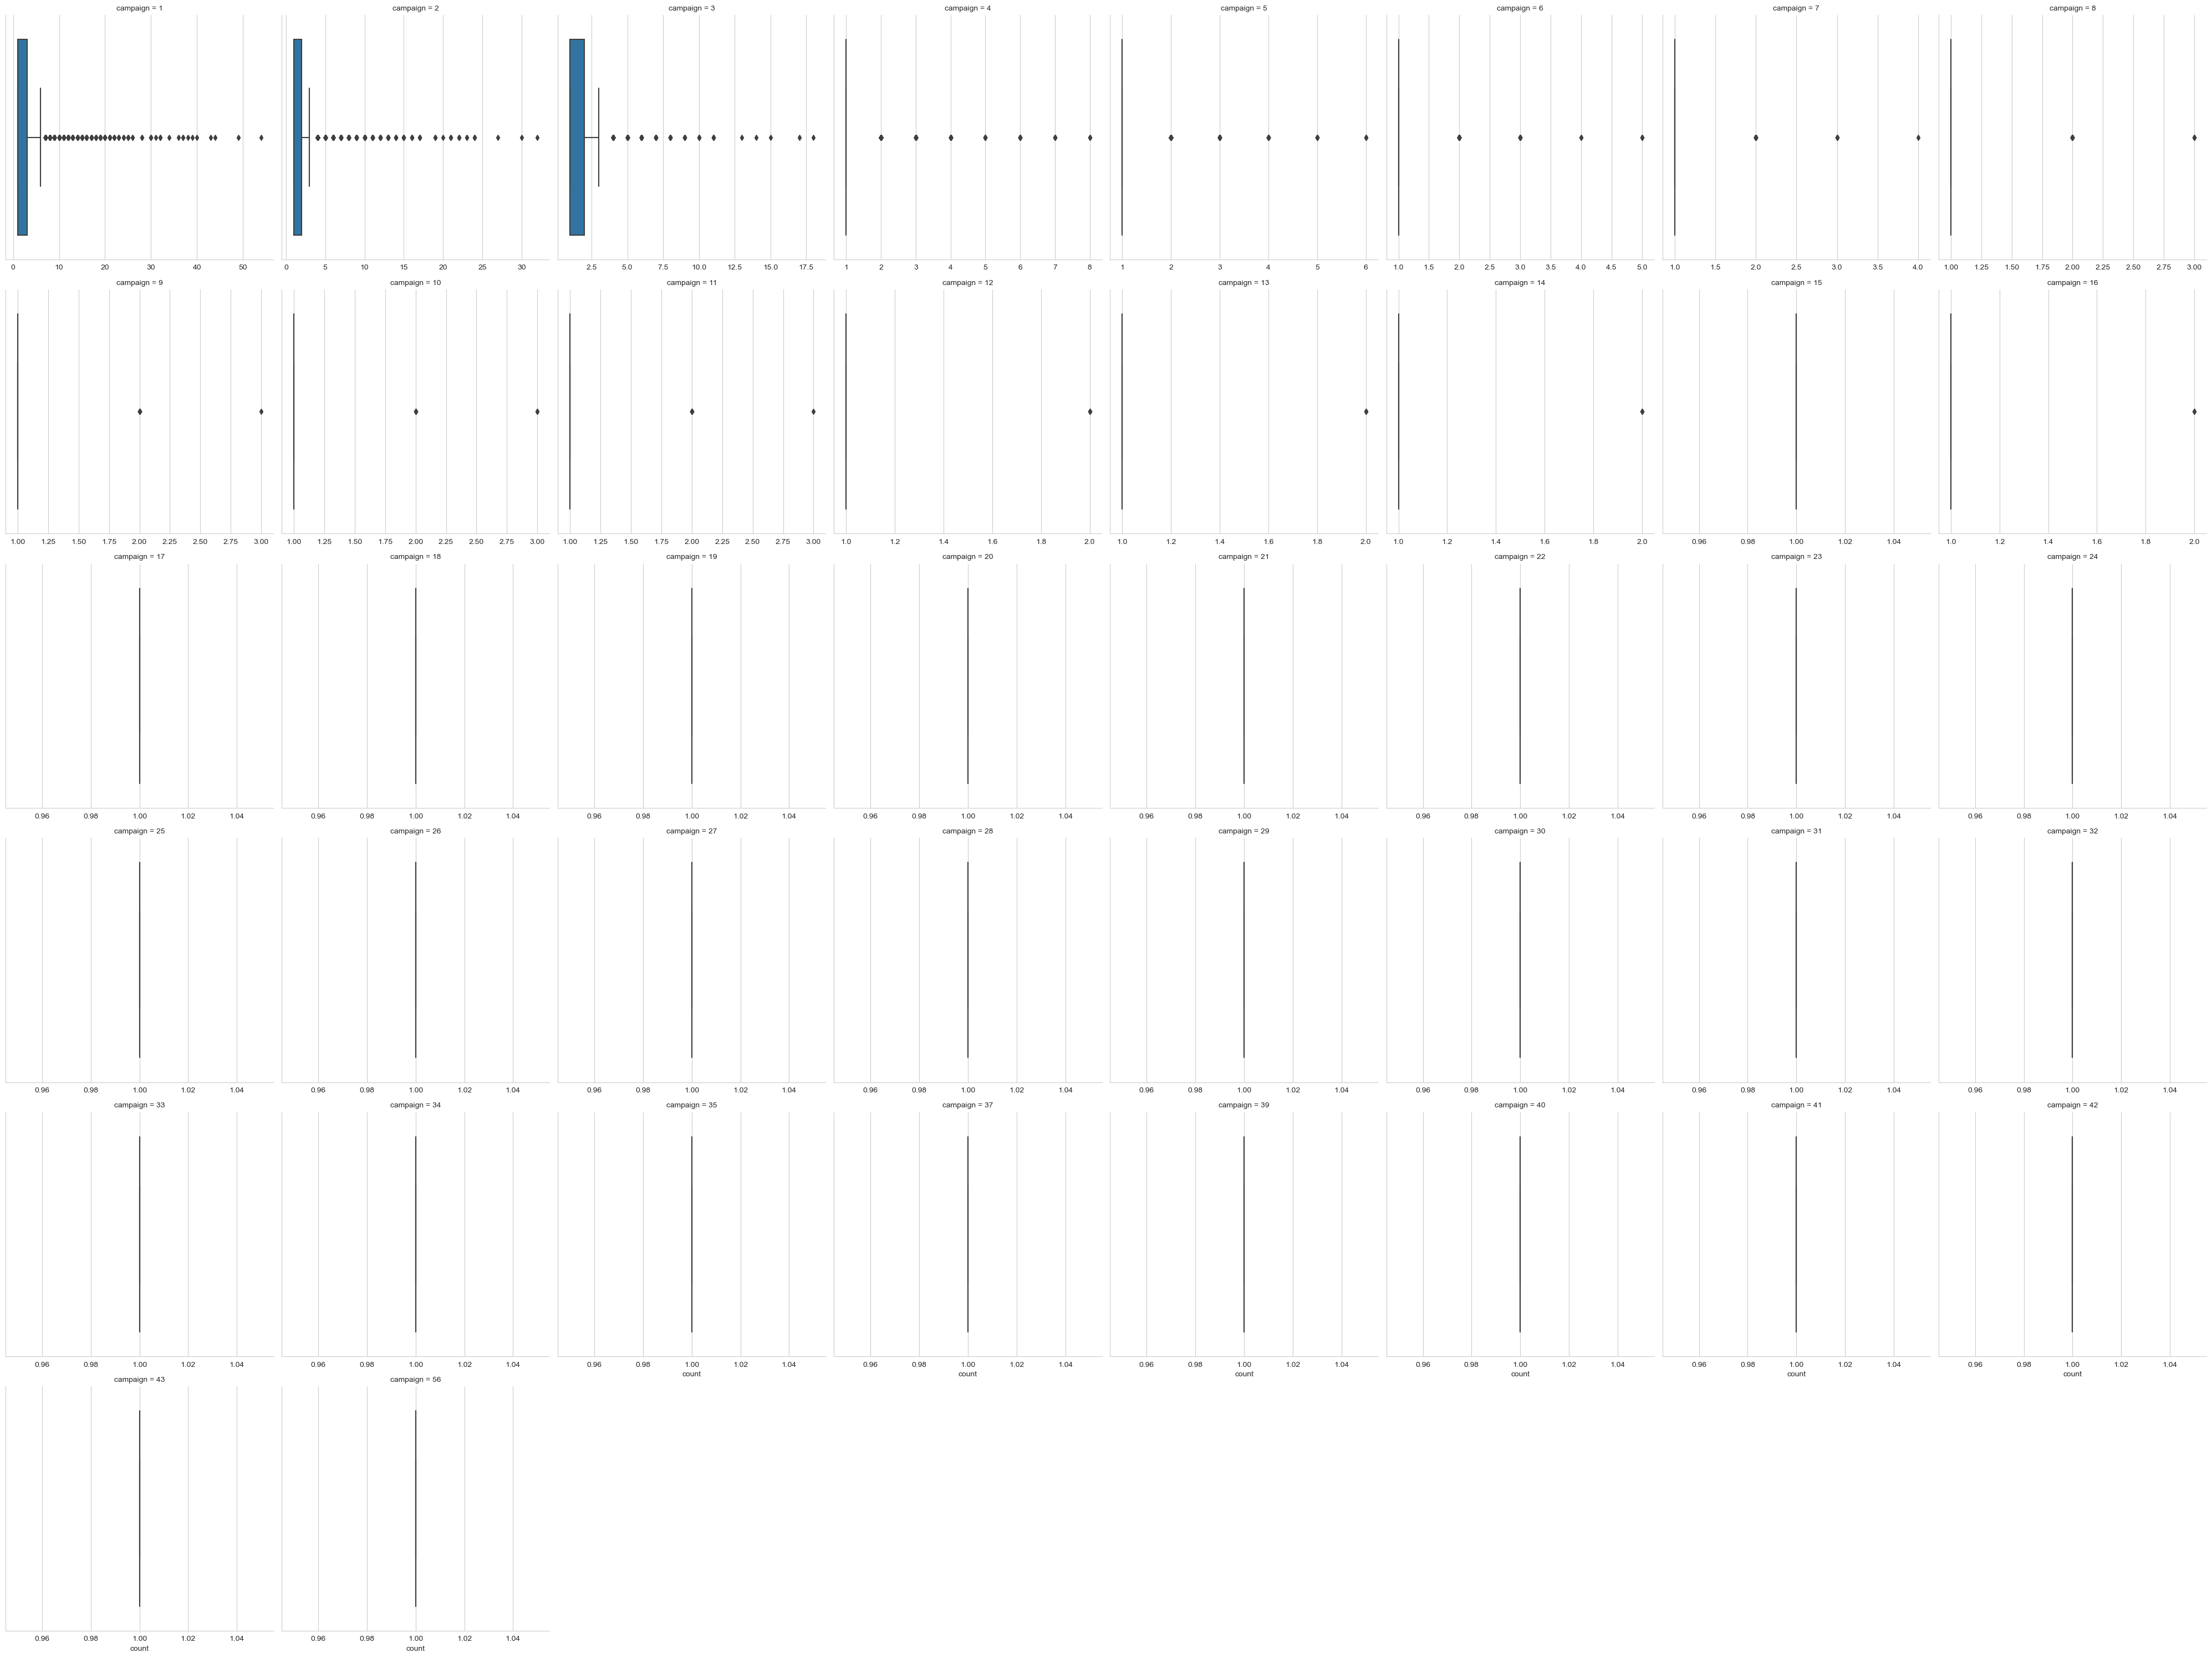

In [54]:
sns.catplot(data = campaign_engagement,
            x= "count",
            kind="box",
            col="campaign", # drawing each campaign into 1 plot
            col_wrap=8, # creating 4 columns
            sharex=False   #to make each graph not to share x axis scale
            # showfliers=False
            )

plt.show()